## Training Logistic Regression with Cross-Entropy Loss in Pytorch

### Preparing the Data and the Model

In [15]:
import torch
from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-2, 2, 0.1).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0], 1)
        self.y[self.x[:, 0] > 0.2] = 1
        self.len = self.x.shape[0]
        
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
    
    def __len__(self):
        return self.len

In [2]:
data_set = Data() 

In [3]:
class LogisticRegression(torch.nn.Module):
    
    def __init__(self, n_inputs):
        super().__init__()
        self.linear = torch.nn.Linear(n_inputs, 1)
        
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return  y_pred

In [4]:
log_regr = LogisticRegression(1)

In [5]:
print('checking parameters:', log_regr.state_dict())

checking parameters: OrderedDict([('linear.weight', tensor([[0.4535]])), ('linear.bias', tensor([0.2719]))])


### Model Training with Cross-Entropy 

In [13]:
optimizer = torch.optim.SGD(log_regr.parameters(), lr=2)
criterion = torch.nn.BCELoss()

In [16]:
# Creating the DataLoader
train_loader = DataLoader(dataset=data_set, batch_size=2)

In [17]:
Loss = []
epochs = 50
for epoch in range (epochs):
    for x, y in train_loader:
        y_pred = log_regr(x)
        loss = criterion(y_pred, y)
        Loss.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'epoch = {epoch}, loss = {loss}')
print('Done!')

epoch = 0, loss = 0.0010112141026183963
epoch = 1, loss = 0.00021319999359548092
epoch = 2, loss = 7.766808266751468e-05
epoch = 3, loss = 3.510780516080558e-05
epoch = 4, loss = 1.7941174519364722e-05
epoch = 5, loss = 9.95403024717234e-06
epoch = 6, loss = 5.90087938689976e-06
epoch = 7, loss = 3.695495706779184e-06
epoch = 8, loss = 2.3245843294716906e-06
epoch = 9, loss = 1.549722128402209e-06
epoch = 10, loss = 1.0132795296158292e-06
epoch = 11, loss = 7.748607231405913e-07
epoch = 12, loss = 5.364419735087722e-07
epoch = 13, loss = 4.172326271145721e-07
epoch = 14, loss = 2.3841860752327193e-07
epoch = 15, loss = 1.788139627478813e-07
epoch = 16, loss = 1.788139627478813e-07
epoch = 17, loss = 1.1920930376163597e-07
epoch = 18, loss = 5.960465188081798e-08
epoch = 19, loss = 5.960465188081798e-08
epoch = 20, loss = 5.960465188081798e-08
epoch = 21, loss = 5.960465188081798e-08
epoch = 22, loss = 0.0
epoch = 23, loss = 0.0
epoch = 24, loss = 0.0
epoch = 25, loss = 0.0
epoch = 26, 

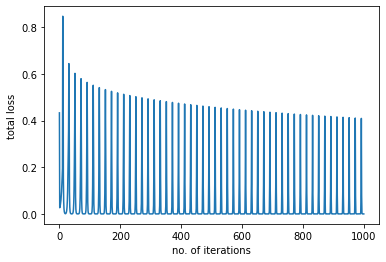

In [18]:
import matplotlib.pyplot as plt

plt.plot(Loss)
plt.xlabel('no. of iterations')
plt.ylabel('total loss')
plt.show()

### Verify with Test Data

In [19]:
y_pred = log_regr(data_set.x)
label = y_pred > 0.5 
print('Model Accuracy on Test Data:', 
      torch.mean((label == data_set.y.type(torch.ByteTensor)).type(torch.float)))

Model Accuracy on Test Data: tensor(1.)
